In [13]:
cd ~/Desktop/workbench/fa21/cs285/hw2

/Users/gautam/Desktop/workbench/fa21/cs285/hw2


In [21]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 22})
np.random.seed(seed=1)


def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.
  
    Source: https://jwalton.info/Matplotlib-latex-PGF/
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [98]:
width, height = set_size(600 * 1.5, subplots=(1, 1))

### Experiment 1: Cartpole

In [122]:
runs = glob.glob('logs/cartpole/*-Eval_AverageReturn.csv')
sb_runs = [run for run in runs if 'q1_sb' in run]
lb_runs = [run for run in runs if 'q1_lb' in run]

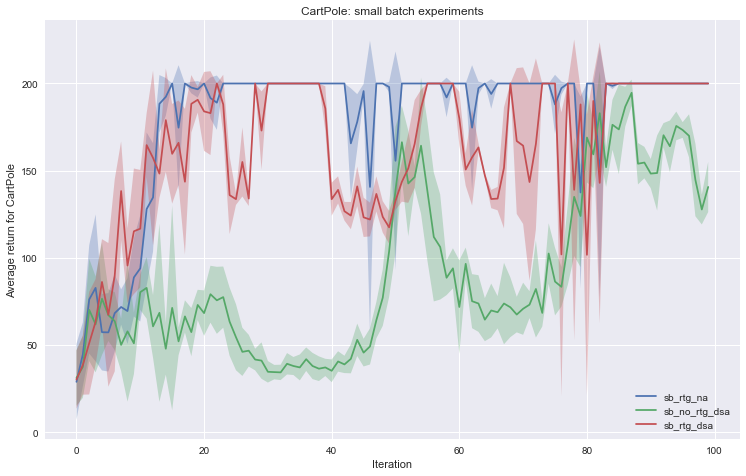

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in sb_runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('q1_')[-1].split('_CartPole')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    line.set_label(param_str)
    
ax.set_ylabel('Average return for CartPole')
ax.set_xlabel('Iteration')
ax.set_title('CartPole: small batch experiments')
ax.legend(frameon=False, loc='lower right')

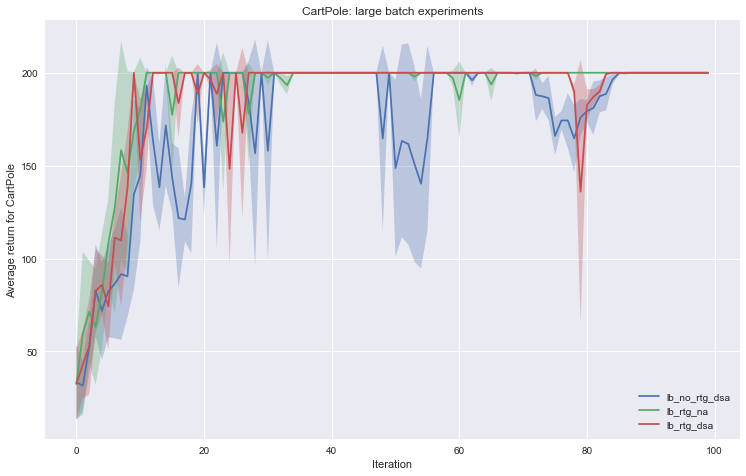

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in lb_runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('q1_')[-1].split('_CartPole')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    line.set_label(param_str)
    
ax.set_ylabel('Average return for CartPole')
ax.set_xlabel('Iteration')
ax.set_title('CartPole: large batch experiments')
ax.legend(frameon=False, loc='lower right')

### Experiment 2: Inverted Pendulum

Text(0.5, 1.0, 'InvertedPendulum: batch size 1000, lr 0.01')

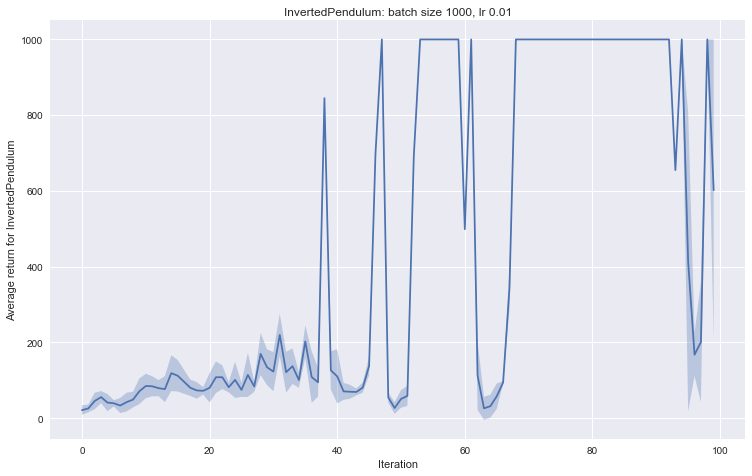

In [149]:
runs = glob.glob('logs/pendulum/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values

    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)

ax.set_ylabel('Average return for InvertedPendulum')
ax.set_xlabel('Iteration')
ax.set_title('InvertedPendulum Results')
ax.set_title('InvertedPendulum: batch size 1000, lr 0.01')

### Experiment 3: Lunar Lander

Text(0.5, 1.0, 'LunarLander Results')

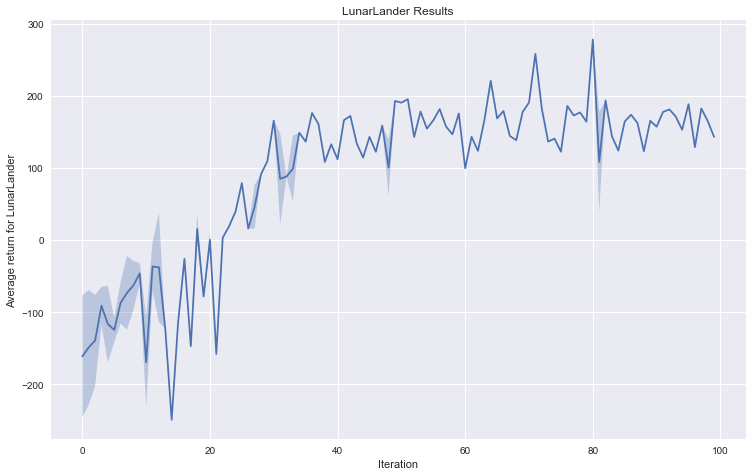

In [150]:
runs = glob.glob('logs/lander/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_rtg')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    label_str = f"$\lambda$={param_str.split('_Hopper')[0].split('_lambda')[-1]}"
    line.set_label(label_str)
    
ax.set_ylabel('Average return for LunarLander')
ax.set_xlabel('Iteration')
ax.set_title('LunarLander Results')

### Experiment 4: HalfCheetah

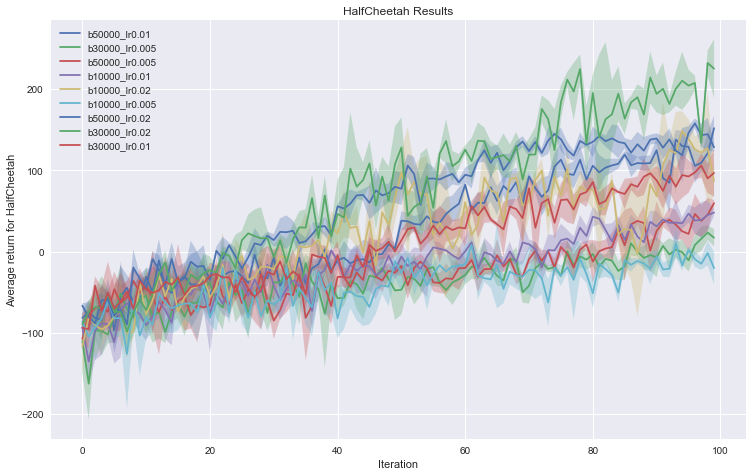

In [159]:
runs = glob.glob('logs/halfcheetah/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_rtg')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    line.set_label(param_str)
    
ax.set_ylabel('Average return for HalfCheetah')
ax.set_xlabel('Iteration')
ax.set_title('HalfCheetah Results')
ax.legend(frameon=False, loc='upper left')

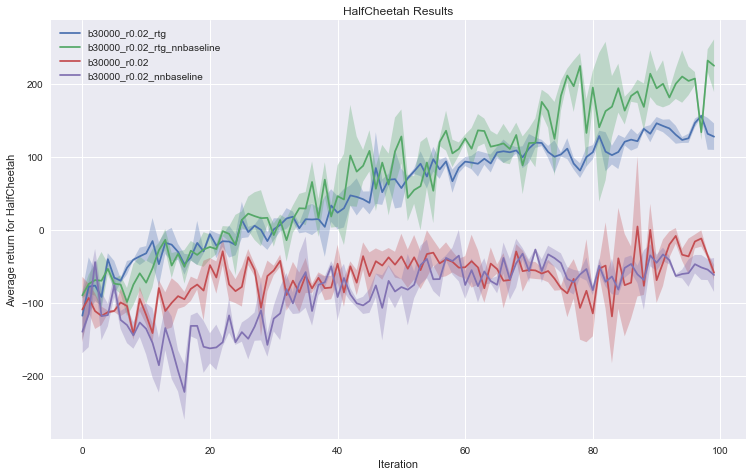

In [156]:
runs = glob.glob('logs/halfcheetah/optimal/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_HalfCheetah')[0].split('q4_')[-1]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    line.set_label(param_str)
    
ax.set_ylabel('Average return for HalfCheetah')
ax.set_xlabel('Iteration')
ax.set_title('HalfCheetah Results')
ax.legend(frameon=False, loc='upper left')

### Experiment 5: Hopper GAE

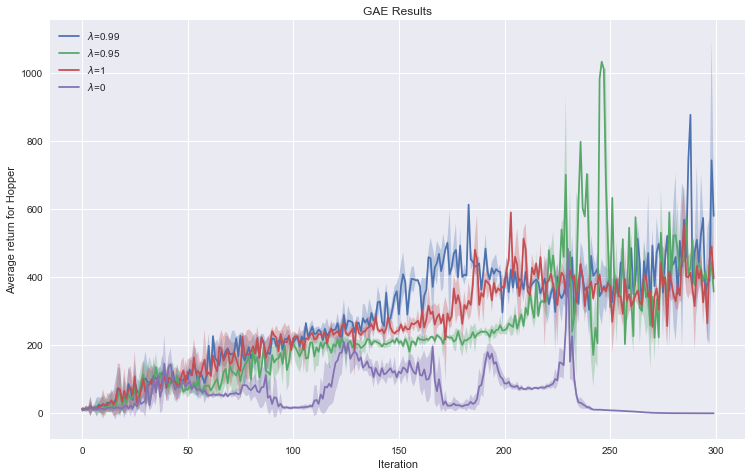

In [160]:
runs = glob.glob('logs/hopper/*-Eval_AverageReturn.csv')

fig, ax = plt.subplots(1, 1, figsize=(width, height))

for run in runs:
    df = pd.read_csv(run)
    
    std_run = ''.join(run.split('-Eval_AverageReturn.csv') + ['-Eval_StdReturn.csv'])
    std_df = pd.read_csv(std_run)
    std = std_df['Value'].values
    
    param_str = run.split('_search_')[-1].split('_rtg')[0]
    steps = df['Step'].values
    values = df['Value'].values
    line, = ax.plot(steps, values)
    ax.fill_between(steps, values-std, values+std, alpha=0.3)
    label_str = f"$\lambda$={param_str.split('_Hopper')[0].split('_lambda')[-1]}"
    line.set_label(label_str)
    
ax.set_ylabel('Average return for Hopper')
ax.set_xlabel('Iteration')
ax.set_title('GAE Results')
ax.legend(frameon=False, loc='upper left')